# BOOK RENTAL PROJECT

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## READING ALL DATASETS

In [2]:
books=pd.read_csv("BX-Books.csv", encoding="latin1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
books

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [4]:
users=pd.read_csv("BX-Users.csv", encoding="latin1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
users

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278854,278854,"portland, oregon, usa",NaN
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",NaN
278857,278857,"knoxville, tennessee, usa",NaN


In [6]:
ratings=pd.read_csv("BX-Book-Ratings.csv", encoding="latin1")

In [7]:
ratings

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


# EXPLORATORY DATA ANALYSIS OF BOOKS DATASET

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [9]:
books.shape

(271379, 5)

In [10]:
books.describe()

,isbn,book_title,book_author,year_of_publication,publisher
count,271379,271379,271378,271379,271377
unique,271379,242150,102042,202,16823
top,783500122,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,17145,7535


In [11]:
books.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [12]:
bookauthor=books["book_author"].value_counts()

In [13]:
bookauthor.sort_values()

Marjon Schaefer              1
Karen Lombardi Ingle         1
Matt Hern                    1
Rochelle Davis               1
Gillian Harding Russell      1
                          ... 
Carolyn Keene              373
Ann M. Martin              423
Stephen King               524
William Shakespeare        567
Agatha Christie            632
Name: book_author, Length: 102042, dtype: int64

## Agatha Christie has the most published books, followed by William Shakespeare, Stephen King, Ann M. Martin and rest there are many authors with less than 100 published books

In [14]:
publisher=books["publisher"].value_counts()

In [15]:
publisher.sort_values()

Haworth Pr Inc                            1
MacDonald Orbis                           1
Editorial Mileto                          1
Viking Bookspan Large Print Edition       1
Gordon Press                              1
                                       ... 
Bantam Books                           3646
Ballantine Books                       3783
Pocket                                 3905
Silhouette                             4220
Harlequin                              7535
Name: publisher, Length: 16823, dtype: int64

## The publisher Harlequin is found to be publishing highest numbers of books followed by Silhouette, Pocket, Ballantine Books, Bantam Books and there are many publishers with less and very few numbers of published books

In [16]:
year=books["year_of_publication"].value_counts()

In [17]:
year

2002                     17145
1999                     16928
2001                     16849
2000                     16702
1998                     15272
                         ...  
Isadora Duncan               1
Salvador de Madariaga        1
1965                         1
Jules Janin                  1
2012                         1
Name: year_of_publication, Length: 202, dtype: int64

In [18]:
print(year.sort_values().to_markdown())

|                       |   year_of_publication |
|:----------------------|----------------------:|
| 2012                  |                     1 |
| 1917                  |                     1 |
| 1897                  |                     1 |
| 1919                  |                     1 |
| 1908                  |                     1 |
| &amp                  |                     1 |
| 1914                  |                     1 |
| Luella Hill           |                     1 |
| Stan Berenstain       |                     1 |
| 2038                  |                     1 |
| 1920                  |                     1 |
| 1929                  |                     1 |
| 1910                  |                     1 |
| 1930                  |                     1 |
| 1953                  |                     1 |
| 1958                  |                     1 |
| 1946                  |                     1 |
| 1949                  |                     1 |


## As we can see that there are many irrelevant values in the variable year_of_publication viz., the year 0, 2024, 2026, 2030, 2037, 2038, 2050 and also some values are with the author, publisher name.
## Also its taking two zeros as unique value and there is a objects with meta characters. Manual replacement of value.

In [19]:
books_new=pd.read_csv("BX-Books-New.csv", encoding="latin1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [21]:
books_new.isna().sum()

isbn                      0
book_title                0
book_author               1
year_of_publication    4621
publisher                 2
dtype: int64

In [22]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"Isadora Duncan":np.nan,"Bart Rulon":np.nan,"Alan Rich":np.nan, "Beatrix Potter":np.nan})

In [23]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"DK Publishing Inc":np.nan, "Frank Muir":np.nan})

In [24]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"ROBERT A. WILSON": np.nan, "Karen T. Whittenburg":np.nan, "Salvador de Madariaga":np.nan})

In [25]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"George H. Scherr":np.nan,"K.C. Constantine":np.nan,"John Peterman":np.nan, "Francine Pascal":np.nan,"Gallimard":np.nan})

In [26]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"Stan Berenstain":np.nan, "Jules Janin":np.nan,"John Alderson Foote":np.nan, "Luella Hill":np.nan})

In [27]:
books_new["year_of_publication"]=books_new["year_of_publication"].replace({"2024":np.nan, "2026":np.nan, "2030":np.nan, "2037":np.nan, "2038":np.nan, "2050":np.nan})

In [28]:
year1=books_new["year_of_publication"].value_counts()

In [29]:
print(year1.sort_values().to_markdown())

|      |   year_of_publication |
|-----:|----------------------:|
| 1376 |                     1 |
| 1806 |                     1 |
| 1897 |                     1 |
| 1378 |                     1 |
| 1906 |                     1 |
| 1904 |                     1 |
| 2021 |                     1 |
| 2012 |                     1 |
| 1910 |                     1 |
| 1914 |                     1 |
| 1917 |                     1 |
| 1919 |                     1 |
| 1934 |                     1 |
| 2008 |                     1 |
| 1908 |                     1 |
| 1924 |                     2 |
| 1902 |                     2 |
| 1921 |                     2 |
| 1922 |                     2 |
| 2010 |                     2 |
| 1927 |                     2 |
| 1925 |                     2 |
| 1928 |                     2 |
| 2011 |                     2 |
| 1909 |                     2 |
| 1926 |                     2 |
| 2006 |                     3 |
| 1935 |                     3 |
| 1931 |  

In [30]:
books_new.isna().sum()

isbn                      0
book_title                0
book_author               1
year_of_publication    4653
publisher                 2
dtype: int64

In [31]:
books_year=books_new.sort_values("year_of_publication")

In [32]:
books_year

,isbn,book_title,book_author,year_of_publication,publisher
253767,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus
171826,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp
245622,781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp
108560,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,1900.0,Random House
...,...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,NaN,Penguin Books Ltd
270932,340571187,Postmens House,Maggie Hemingway,NaN,Trafalgar Square
271113,8427201079,El Misterio De Sittaford,Agatha Christie,NaN,Editorial Molino
271201,887781721,Tom Penny,Tony German,NaN,P. Martin Associates


In [33]:
books_year["year_of_publication"]=books_year["year_of_publication"].interpolate(method="linear", limit_direction="forward")

In [34]:
books_year

,isbn,book_title,book_author,year_of_publication,publisher
253767,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus
171826,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp
245622,781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp
108560,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,1900.0,Random House
...,...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,2021.0,Penguin Books Ltd
270932,340571187,Postmens House,Maggie Hemingway,2021.0,Trafalgar Square
271113,8427201079,El Misterio De Sittaford,Agatha Christie,2021.0,Editorial Molino
271201,887781721,Tom Penny,Tony German,2021.0,P. Martin Associates


In [35]:
books_year.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [36]:
books_year["year_of_publication"]=books_year["year_of_publication"].astype("int")

In [37]:
books_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271379 entries, 253767 to 271215
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  int64 
 4   publisher            271377 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


### Finding Duplication of rows

In [38]:
books_year.duplicated()

253767    False
227544    False
171826    False
245622    False
108560    False
          ...  
270813    False
270932    False
271113    False
271201    False
271215    False
Length: 271379, dtype: bool

In [39]:
books_year.drop_duplicates()

,isbn,book_title,book_author,year_of_publication,publisher
253767,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
171826,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
245622,781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897,Reprint Services Corp
108560,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,1900,Random House
...,...,...,...,...,...
270813,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,2021,Penguin Books Ltd
270932,340571187,Postmens House,Maggie Hemingway,2021,Trafalgar Square
271113,8427201079,El Misterio De Sittaford,Agatha Christie,2021,Editorial Molino
271201,887781721,Tom Penny,Tony German,2021,P. Martin Associates


## As the length of dataset doesn't changed, we can say that there is no duplication of rows

In [40]:
books_year["book_author"]=books_year["book_author"].fillna("other")

In [41]:
books_year["publisher"]=books_year["publisher"].fillna("other")

In [42]:
books_year.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [43]:
books_isbn=books_year.sort_values("isbn")

In [44]:
books_isbn

,isbn,book_title,book_author,year_of_publication,publisher
42605,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers
51435,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers
134866,000123207X,Paddington's Birthday Party,Michael Bond,1942,HarperCollins Publishers
244117,000160418X,The Clue in the Crumbling Wall,Carolyn Keene,1984,HarperCollins Publishers
52286,000171421X,It's Not Easy Being a Bunny (A Beginner Book),Marilyn Sadler,1984,HarperCollins Publishers
...,...,...,...,...,...
72808,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton
193540,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf
131093,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,2021,Viking Adult
179433,B0002JV9PY,The Blockade Runners,Jules Verne,2021,Digireads.com


## My final cleaned dataset for books is books_isbn

# EXPLORATORY DATA ANALYSIS OF USERS DATASET

In [45]:
users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [47]:
users.shape

(278859, 3)

In [48]:
users.describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [49]:
users.describe(include="O")

,user_id,Location
count,278859,278858
unique,278859,57339
top,271615,"london, england, united kingdom"
freq,1,2506


In [50]:
users.isna().sum()

user_id          0
Location         1
Age         110763
dtype: int64

## As we can see from the error: when we run code: users.user_id=users.user_id.astype("int") that there is a object with meta characters in user_id. 
## Manual replacement of value

In [51]:
users_new=pd.read_csv("BX-Users_New.csv", encoding="latin1")

## While manual replacement of the object with meta characters i can see that the sequentially considered user id found shifted down due to the characters present at that value. So arranged the user id sequentially and replaced the user id with sequential number 275082 

In [52]:
users_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [53]:
users_new.Location=users_new.Location.fillna("other")

In [54]:
users_new.describe()

,user_id,Age
count,278859.000000,168096.000000
mean,139430.000000,34.751434
std,80499.803695,14.428097
min,1.000000,0.000000
25%,69715.500000,24.000000
50%,139430.000000,32.000000
75%,209144.500000,44.000000
max,278859.000000,244.000000


In [55]:
users_new.describe(include="O")

,Location
count,278859
unique,57340
top,"london, england, united kingdom"
freq,2506


In [56]:
users_new.isna().sum()

user_id          0
Location         0
Age         110763
dtype: int64

In [57]:
list_ = users_new.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users_new = pd.concat([users_new, df_city], axis=1)
users_new = pd.concat([users_new, df_state], axis=1)
users_new = pd.concat([users_new, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4662
16047


In [58]:
users_new=users_new.drop(['Location'], axis=1)

In [59]:
users_new.head(10)

,user_id,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom
5,6,61.0,santa monica,california,usa
6,7,NaN,washington,dc,usa
7,8,NaN,timmins,ontario,canada
8,9,NaN,germantown,tennessee,usa
9,10,26.0,albacete,wisconsin,spain


In [60]:
users_new.isna().sum()

user_id         0
Age        110763
City            0
State           0
Country         0
dtype: int64

## Treating The null values in Variable Age

In [61]:
users_new.Age.mean()

34.75143370454978

In [62]:
users_new.Age=users_new.Age.fillna(users_new.Age.mean())

In [63]:
users_new.isna().sum()

user_id    0
Age        0
City       0
State      0
Country    0
dtype: int64

In [64]:
print(users_new.Age.value_counts().sort_values().to_markdown())

|          |    Age |
|---------:|-------:|
| 138      |      1 |
| 229      |      1 |
| 230      |      1 |
| 231      |      1 |
| 220      |      1 |
| 237      |      1 |
| 119      |      1 |
| 239      |      1 |
| 186      |      1 |
| 107      |      1 |
| 157      |      1 |
| 127      |      1 |
| 137      |      1 |
| 143      |      1 |
| 140      |      1 |
| 146      |      1 |
| 162      |      1 |
| 110      |      1 |
| 226      |      1 |
| 128      |      1 |
| 159      |      1 |
| 111      |      1 |
| 223      |      1 |
| 156      |      1 |
| 118      |      1 |
| 175      |      1 |
| 172      |      1 |
| 183      |      1 |
| 208      |      1 |
| 189      |      1 |
| 152      |      1 |
| 244      |      1 |
| 132      |      1 |
| 201      |      1 |
| 168      |      1 |
| 212      |      1 |
| 207      |      1 |
| 109      |      1 |
| 219      |      1 |
|  95      |      1 |
| 133      |      2 |
| 136      |      2 |
|  89      |      2 |
| 200     

In [65]:
for i in users_new.Age:
    if i < 10:
        users_new.Age=users_new.Age.replace(i, 24)
    elif i>80:
        users_new.Age=users_new.Age.replace(i, 44)
else:
    print("replaced")

replaced


In [66]:
print(users_new.Age.value_counts().sort_values().to_markdown())

|         |    Age |
|--------:|-------:|
| 80      |     48 |
| 79      |     62 |
| 78      |     73 |
| 77      |     82 |
| 10      |     84 |
| 76      |    114 |
| 75      |    119 |
| 11      |    121 |
| 74      |    170 |
| 12      |    192 |
| 73      |    200 |
| 72      |    223 |
| 71      |    286 |
| 70      |    315 |
| 69      |    373 |
| 68      |    426 |
| 67      |    465 |
| 66      |    545 |
| 65      |    593 |
| 64      |    680 |
| 63      |    792 |
| 62      |    882 |
| 13      |    885 |
| 61      |   1035 |
| 60      |   1125 |
| 59      |   1205 |
| 58      |   1319 |
| 56      |   1692 |
| 57      |   1878 |
| 55      |   1885 |
| 14      |   1962 |
| 53      |   2072 |
| 52      |   2077 |
| 54      |   2140 |
| 51      |   2203 |
| 48      |   2303 |
| 50      |   2340 |
| 15      |   2383 |
| 49      |   2461 |
| 47      |   2512 |
| 45      |   2518 |
| 46      |   2526 |
| 16      |   2570 |
| 42      |   2758 |
| 43      |   2816 |
| 41      |  

In [67]:
users_new.Age=users_new.Age.astype("int")

In [68]:
users_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  278859 non-null  int64 
 1   Age      278859 non-null  int64 
 2   City     278859 non-null  object
 3   State    278859 non-null  object
 4   Country  278859 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [69]:
users_new.drop_duplicates()

,user_id,Age,City,State,Country
0,1,34,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,34,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,34,farnborough,hants,united kingdom
...,...,...,...,...,...
278854,278855,34,portland,oregon,usa
278855,278856,50,tacoma,washington,united kingdom
278856,278857,34,brampton,ontario,canada
278857,278858,34,knoxville,tennessee,usa


## As the length of dataset doesn't changed, we can say that there is no duplication of rows

In [70]:
users_new1=users_new.sort_values("user_id")

In [71]:
users_new1

,user_id,Age,City,State,Country
0,1,34,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,34,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,34,farnborough,hants,united kingdom
...,...,...,...,...,...
278854,278855,34,portland,oregon,usa
278855,278856,50,tacoma,washington,united kingdom
278856,278857,34,brampton,ontario,canada
278857,278858,34,knoxville,tennessee,usa


In [72]:
users_new1.isna().sum()

user_id    0
Age        0
City       0
State      0
Country    0
dtype: int64

## My final cleaned dataset for users is users_new1

# EXPLORATORY DATA ANALYSIS OF RATINGS DATASET

In [73]:
ratings.head(10)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [74]:
ratings.shape

(1048575, 3)

In [75]:
ratings.describe()

,user_id,rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [76]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [77]:
ratings.nunique()

user_id     95513
isbn       322102
rating         11
dtype: int64

In [78]:
ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [79]:
ratings.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1048575, dtype: bool

In [80]:
ratings_new=ratings.drop_duplicates()

In [81]:
ratings_new.shape

(1048429, 3)

## As the length of dataset changed, we can say that duplicate rows are removed

In [82]:
ratings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048429 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048429 non-null  int64 
 1   isbn     1048429 non-null  object
 2   rating   1048429 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


In [83]:
ratings_new.tail()

,user_id,isbn,rating
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0
1048574,250764,515069434,0


In [84]:
from pandas.api.types import is_numeric_dtype

In [85]:
print(is_numeric_dtype(ratings_new['user_id']))

True


In [86]:
print(is_numeric_dtype(ratings_new['rating']))

True


## My cleaned dataset for ratings is ratings_new

# MERGED DATASET

In [87]:
books_users_ratings=books_isbn.merge(ratings_new, how="inner", on="isbn").merge(users_new1, how="inner", on="user_id")

In [88]:
books_users_ratings

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating,Age,City,State,Country
0,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902,6,34,london,england,united kingdom
1,000611962X,The Guns of Navarone,Alistair Maclean,1968,HarperCollins Publishers Inc,23902,7,34,london,england,united kingdom
2,006095969X,Martha Quest : A Novel (Perennial Classics),Doris M. Lessing,2001,Perennial,23902,5,34,london,england,united kingdom
3,007051092X,The Fruit and Nut Book,Helena Radecka,1984,McGraw-Hill,23902,7,34,london,england,united kingdom
4,013852632X,The Stress Check: Coping With the Stresses of ...,Cary L. Cooper,1980,Simon &amp; Schuster,23902,7,34,london,england,united kingdom
...,...,...,...,...,...,...,...,...,...,...,...
941136,B0000633PU,The Story of Aladdin and the Wonderful Lamp,S. Lane Poole,2021,Renaissance eBooks,16359,8,38,baulkham hills,new south wales,australia
941137,B00006H3BO,1984,George Orwell,2021,"RosettaBooks, LLC",52074,0,21,elche,alicante,spain
941138,B00009ANY9,Cane River,Lalita Tademy,2001,Warner Books,5673,0,34,portland,oregon,usa
941139,B0000D9PEZ,"Body in the Library, The: A Miss Marple Mystery",Agatha Christie,2021,PerfectBound,195713,8,41,canet de mar,other,spain


In [89]:
books_users_ratings.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
user_id                0
rating                 0
Age                    0
City                   0
State                  0
Country                0
dtype: int64

In [90]:
books_users_ratings.drop_duplicates()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating,Age,City,State,Country
0,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902,6,34,london,england,united kingdom
1,000611962X,The Guns of Navarone,Alistair Maclean,1968,HarperCollins Publishers Inc,23902,7,34,london,england,united kingdom
2,006095969X,Martha Quest : A Novel (Perennial Classics),Doris M. Lessing,2001,Perennial,23902,5,34,london,england,united kingdom
3,007051092X,The Fruit and Nut Book,Helena Radecka,1984,McGraw-Hill,23902,7,34,london,england,united kingdom
4,013852632X,The Stress Check: Coping With the Stresses of ...,Cary L. Cooper,1980,Simon &amp; Schuster,23902,7,34,london,england,united kingdom
...,...,...,...,...,...,...,...,...,...,...,...
941136,B0000633PU,The Story of Aladdin and the Wonderful Lamp,S. Lane Poole,2021,Renaissance eBooks,16359,8,38,baulkham hills,new south wales,australia
941137,B00006H3BO,1984,George Orwell,2021,"RosettaBooks, LLC",52074,0,21,elche,alicante,spain
941138,B00009ANY9,Cane River,Lalita Tademy,2001,Warner Books,5673,0,34,portland,oregon,usa
941139,B0000D9PEZ,"Body in the Library, The: A Miss Marple Mystery",Agatha Christie,2021,PerfectBound,195713,8,41,canet de mar,other,spain


# DATAFRAME IMPLICIT AND EXPLICIT

## EXPLICIT RATINGS

In [91]:
df=books_users_ratings[books_users_ratings["rating"] !=0]

In [92]:
df

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating,Age,City,State,Country
0,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902,6,34,london,england,united kingdom
1,000611962X,The Guns of Navarone,Alistair Maclean,1968,HarperCollins Publishers Inc,23902,7,34,london,england,united kingdom
2,006095969X,Martha Quest : A Novel (Perennial Classics),Doris M. Lessing,2001,Perennial,23902,5,34,london,england,united kingdom
3,007051092X,The Fruit and Nut Book,Helena Radecka,1984,McGraw-Hill,23902,7,34,london,england,united kingdom
4,013852632X,The Stress Check: Coping With the Stresses of ...,Cary L. Cooper,1980,Simon &amp; Schuster,23902,7,34,london,england,united kingdom
...,...,...,...,...,...,...,...,...,...,...,...
941133,99993805,Pelican Brief,John Grisham,2021,Trafalgar Square,100667,7,26,auckland,other,new zealand
941135,9999999999,World Directory of Awards and Prizes,Joseph L. Heller,1996,Access Publishers Network,33429,5,29,beijing,jiangsu,china
941136,B0000633PU,The Story of Aladdin and the Wonderful Lamp,S. Lane Poole,2021,Renaissance eBooks,16359,8,38,baulkham hills,new south wales,australia
941139,B0000D9PEZ,"Body in the Library, The: A Miss Marple Mystery",Agatha Christie,2021,PerfectBound,195713,8,41,canet de mar,other,spain


## IMPLICIT RATINGS

In [93]:
df_implicit=books_users_ratings[books_users_ratings["rating"] ==0]

In [94]:
df_implicit

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating,Age,City,State,Country
7,014009363X,Is That It,Bob Geldof,2021,Penguin Putnam~mass,23902,0,34,london,england,united kingdom
48,055352724X,The Sara Paretsky (Value Collections),Sara Paretsky,2000,Random House Audio Publishing Group,23902,0,34,london,england,united kingdom
57,061812702X,Village School (Chronicles of Fairacre),Miss Read,2001,Mariner Books,23902,0,34,london,england,united kingdom
65,068802517X,Joe &amp; Marilyn: A Memory of Love,Roger Kahn,1986,William Morrow &amp; Company,23902,0,34,london,england,united kingdom
75,075400306X,Room at the Top,John Braine,1999,Chivers Audio Books,23902,0,34,london,england,united kingdom
...,...,...,...,...,...,...,...,...,...,...,...
941129,99825201,Deception,Philip Roth,2021,Trafalgar Square,97600,0,34,sydney,new south wales,australia
941130,99914700,Saint Maybe,Anne Tyler,2021,Trafalgar Square,50976,0,33,london,london,united kingdom
941134,99993805,Pelican Brief,John Grisham,2021,Trafalgar Square,104910,0,25,montreal,quebec,canada
941137,B00006H3BO,1984,George Orwell,2021,"RosettaBooks, LLC",52074,0,21,elche,alicante,spain


## Count of Books Ratings given by Users

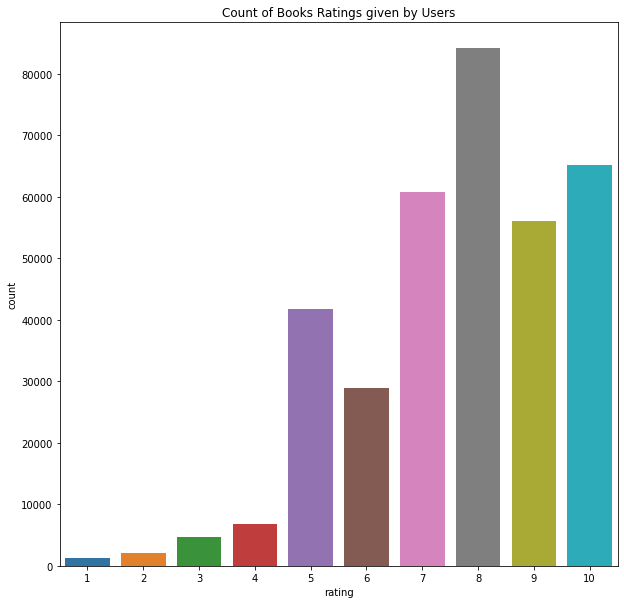

In [95]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="rating")
plt.title("Count of Books Ratings given by Users")
plt.show()

## We can see that most of the books are rated 8 on a scale of 10.

# DATA VISUALIZATION

## Numbers of Books Published Yearly

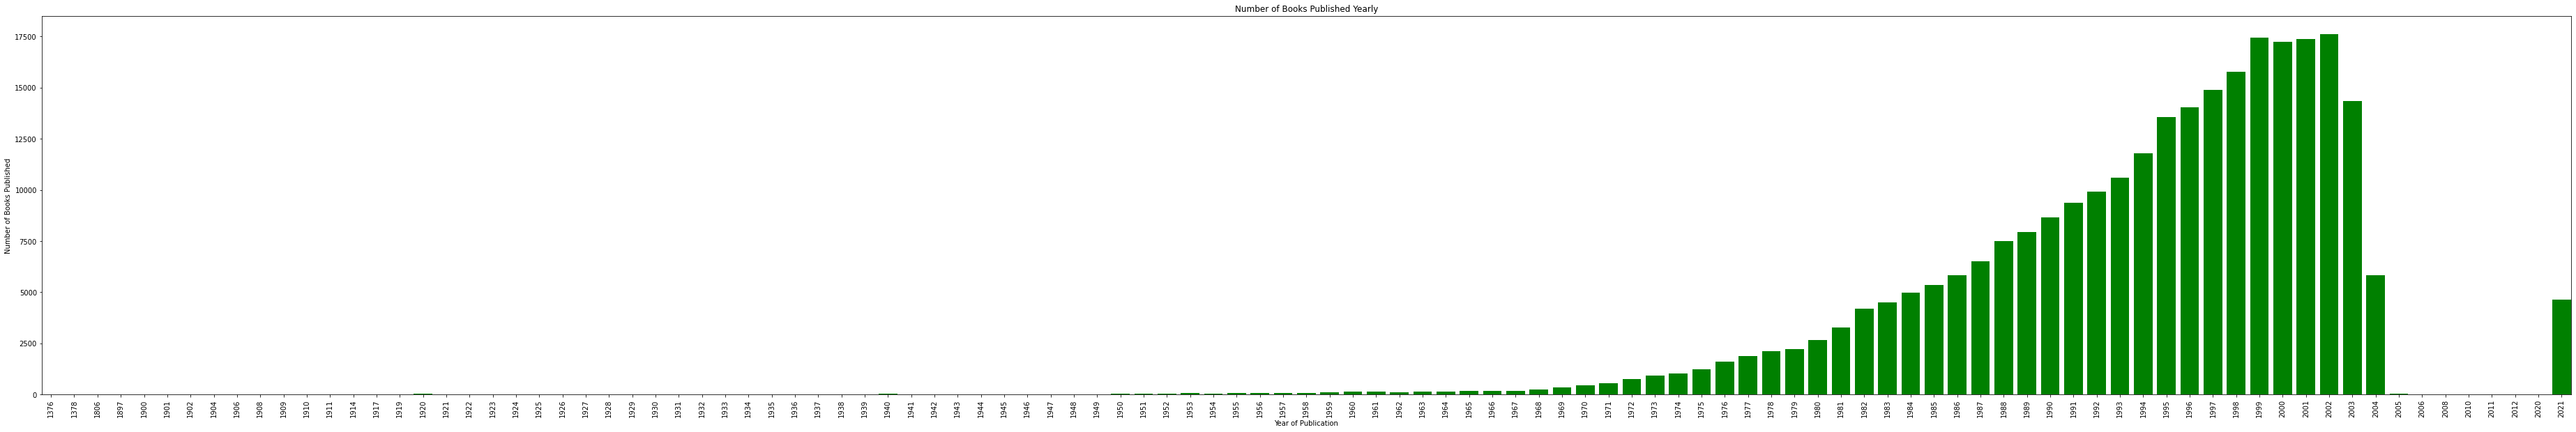

In [96]:
publications = {}
for year in books_isbn['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(65, 10))
plt.bar(list(publications.keys()),list(publications.values()), color="green")
plt.ylabel("Number of Books Published")
plt.xlabel("Year of Publication")
plt.xticks(rotation=90)
plt.title("Number of Books Published Yearly")
plt.margins(x = 0)
plt.show()

## No of Books by an Author

Text(0.5, 1.0, 'No of Books by an Author (Top 15)')

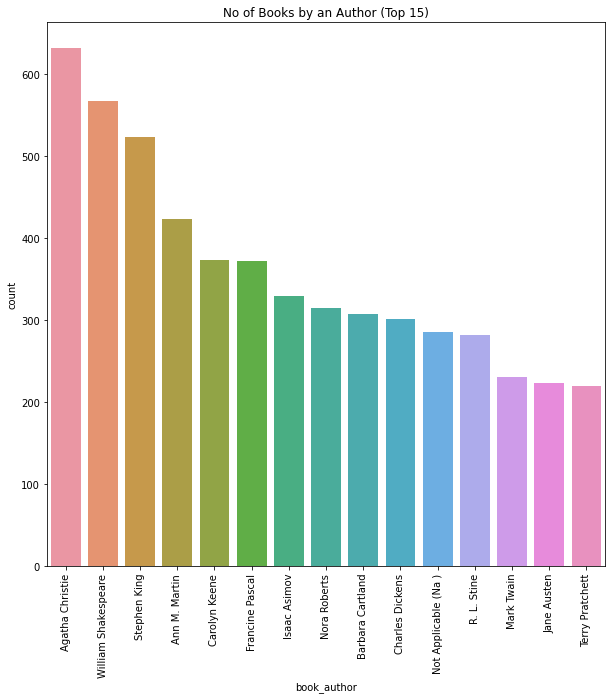

In [97]:
plt.figure(figsize=(10,10))
sns.countplot(x="book_author", data=books_isbn,order=books_isbn['book_author'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Books by an Author (Top 15)")

## No of Books Published by a Publisher

Text(0.5, 1.0, 'No of Books Published by a Publisher (Top 15)')

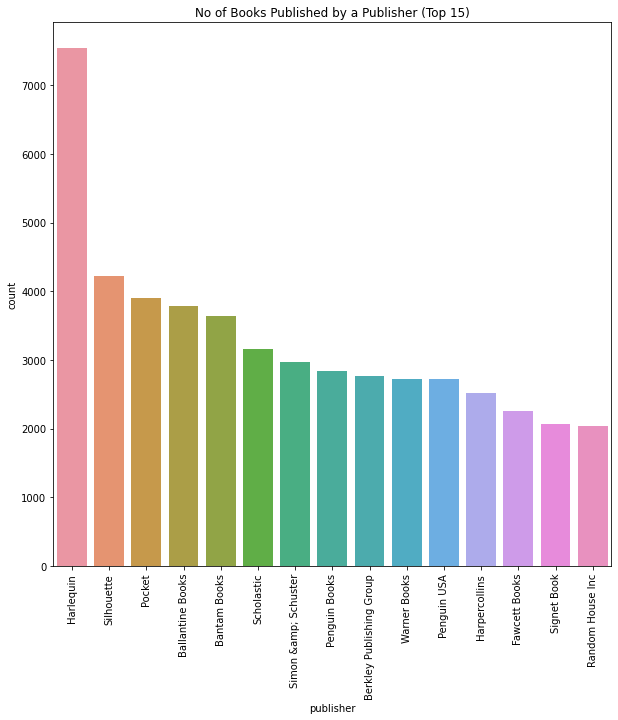

In [98]:
plt.figure(figsize=(10,10))
sns.countplot(x="publisher", data=books_isbn,order=books_isbn['publisher'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Books Published by a Publisher (Top 15)")

## Age Distribution

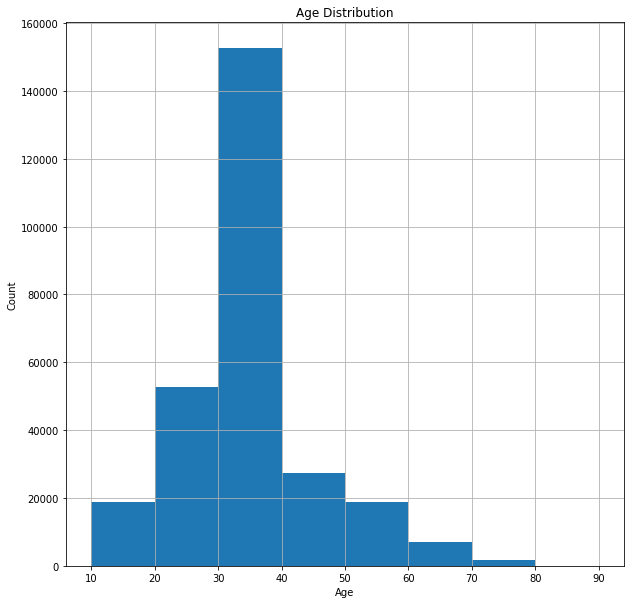

In [99]:
plt.figure(figsize=(10,10))
users_new1.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## No of Readers from each City

Text(0.5, 1.0, 'No of Readers from each City (Top 15)')

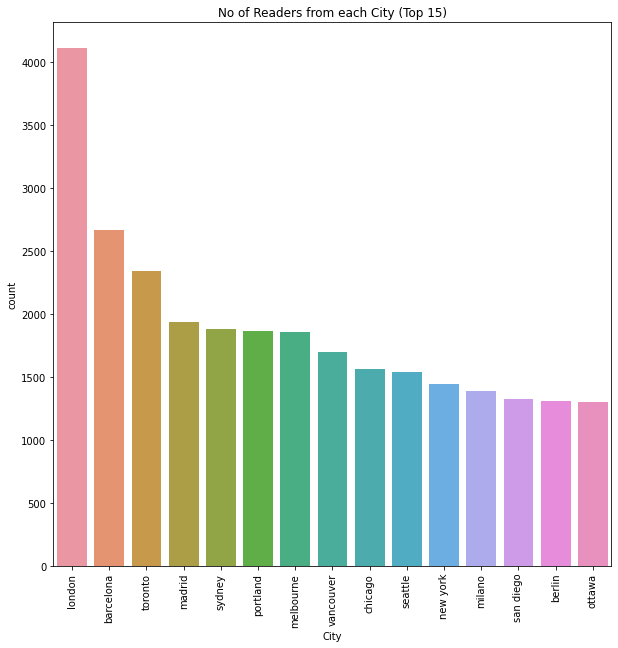

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x="City", data=users_new1,order=users_new1['City'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Readers from each City (Top 15)")

## No of Readers from each State

Text(0.5, 1.0, 'No of Readers from each State (Top 15)')

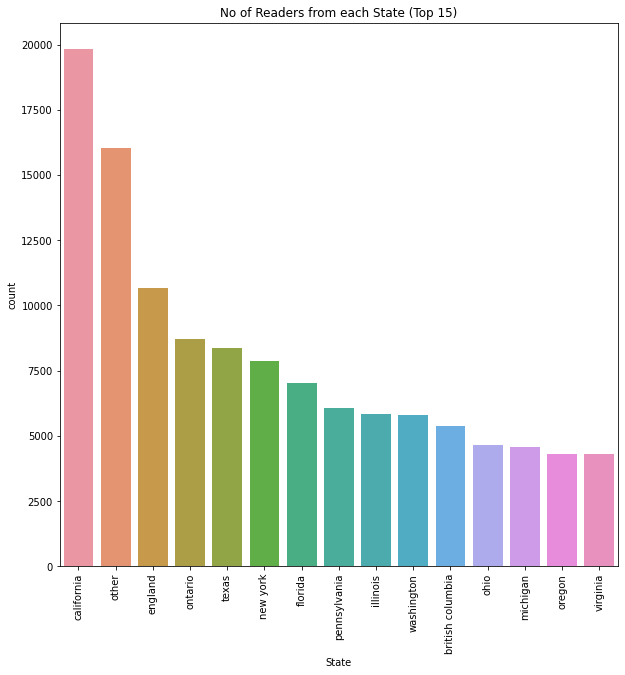

In [101]:
plt.figure(figsize=(10,10))
sns.countplot(x="State", data=users_new1,order=users_new1['State'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Readers from each State (Top 15)")

## No of Readers from each Country 

Text(0.5, 1.0, 'No of Readers from each Country (Top 10)')

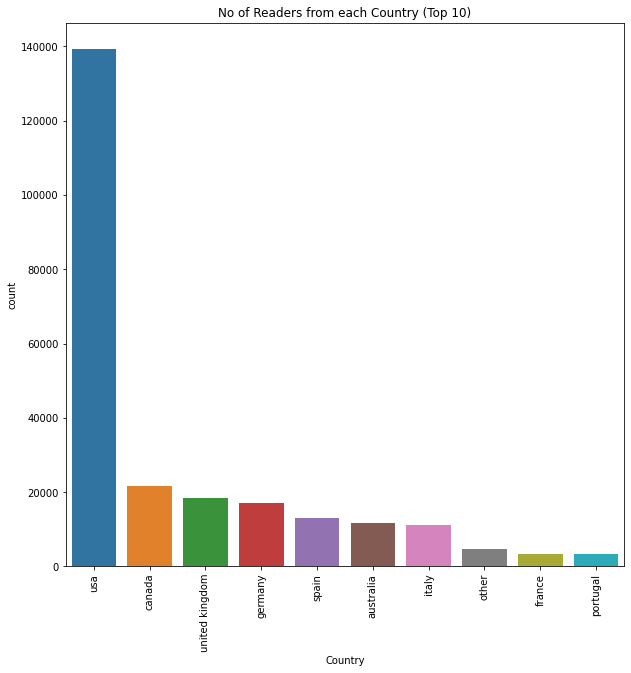

In [102]:
plt.figure(figsize=(10,10))
sns.countplot(x="Country", data=users_new1, order=users_new1['Country'].value_counts().index[0:10])
plt.xticks(rotation=90)
plt.title("No of Readers from each Country (Top 10)")

## No of Readers from state of USA

Text(0.5, 1.0, 'No of Readers from state of USA (Top 15)')

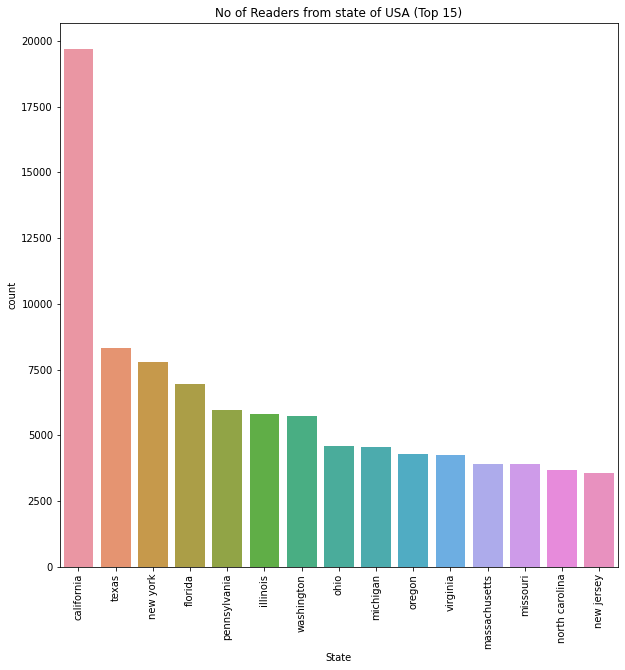

In [103]:
usa=users_new1[users_new1['Country']=='usa']
plt.figure(figsize=(10,10))
sns.countplot(x="State", data=usa,order=usa['State'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Readers from state of USA (Top 15)")

## No of Ratings for a Book

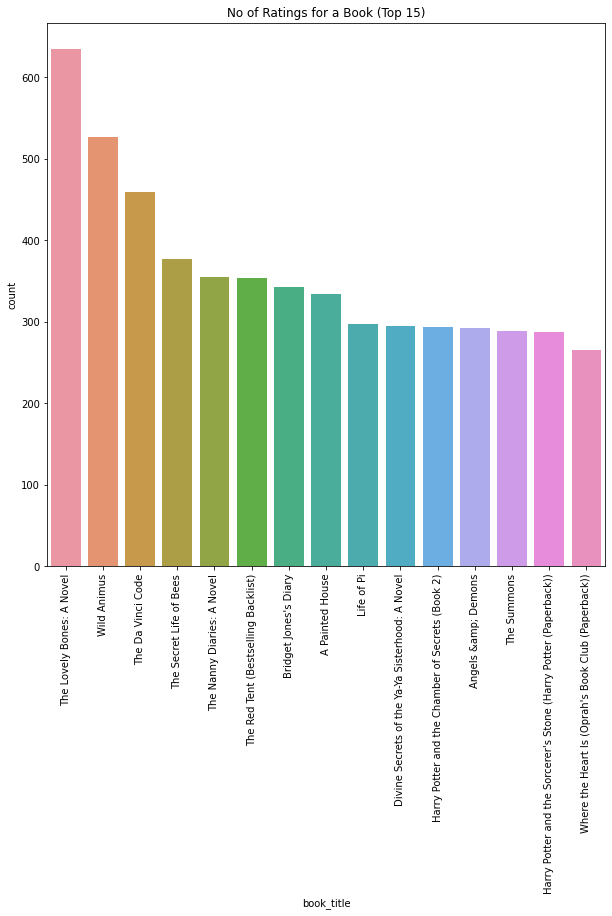

In [104]:
plt.figure(figsize=(10,10))
sns.countplot(x="book_title", data=df, order=df['book_title'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("No of Ratings for a Book (Top 15)")
plt.show()

## Books Popular Yearly

In [105]:
data = pd.DataFrame(df.groupby('isbn')['rating'].count()).sort_values('rating', ascending=False)
data = pd.merge(data, books_isbn, on='isbn', left_index = True)

years = set()
indices = []
for ind, row in data.iterrows():
    if row['year_of_publication'] in years:
        indices.append(ind)
    else:
        years.add(row['year_of_publication'])

data = data.drop(indices)
data = data.drop('rating', axis = 1)
data = data.sort_values('year_of_publication')

pd.set_option("display.max_rows", None, "display.max_columns", None)
data

,isbn,book_title,book_author,year_of_publication,publisher
253767,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz
227544,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus
171826,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
211866,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
184397,671729012,THURBER COUNTRY P,James Thurber,1901,Touchstone
102500,373226888,Tommy's Mom,Linda O. Johnston,1902,Harlequin
45782,038528120X,CATCH 22,JOSEPH HELLER,1904,Delta
170980,404089119,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906,Ams Pr
159763,911662251,Kybalion: A Study of the Hermetic Philosophy o...,Three Initiates,1908,Yoga Publication Society
81251,684719274,Ethan Frome,Edith Wharton,1910,Scribner Book Company


# RECOMMENDATION SYSTEM

In [120]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name:  The Notebook
Enter number of books to recommend:  10


## Collaborative Filtering

In [121]:
df_userbased = pd.DataFrame(df['book_title'].value_counts())
df_userbased['total_ratings'] = df_userbased['book_title']
df_userbased['book_title'] = df_userbased.index
df_userbased.reset_index(level=0, inplace=True)
df_userbased = df_userbased.drop('index',axis=1)

df_userbased = df.merge(df_userbased, left_on = 'book_title', right_on = 'book_title', how = 'left')
df_userbased = df_userbased.drop(['year_of_publication','publisher','Age'], axis=1)

popularity_threshold = 50
popular_book = df_userbased[df_userbased['total_ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [122]:
testdf = pd.DataFrame()
testdf['isbn'] = popular_book['isbn']
testdf['rating'] = popular_book['rating']
testdf['user_id'] = popular_book['user_id']
testdf = testdf[['user_id','rating']].groupby(testdf['isbn'])

In [123]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [124]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer=DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [125]:
def printBookDetails(bookID):
    print(df[df['isbn']==bookID]['book_title'].values[0])
    """
    print("Title:", df[df['isbn']==bookID]['book_title'].values[0])
    print("Author:",df[df['isbn']==bookID]['book_author'].values[0])
    #print("Printing Book-ID:",bookID)
    print("\n")
    """

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if df[df['isbn']==indexMap[i]]['book_title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(df[df['isbn']==indexMap[i]]['book_title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(df[df['isbn']==indexMap[i]]['book_title'].values[0])
    return collaborative

In [126]:
k = list(df['book_title'])
m = list(df['isbn'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
The Notebook

RECOMMENDATIONS:

Pay It Forward
Quentins
Beloved
Breathing Lessons
Hideaway
Back Roads
The Beach House
Siddhartha
Black Notice
A Darkness More Than Night


## Nearest Neighbours Based

In [131]:
from scipy.sparse import csr_matrix

In [132]:
data = (df.groupby(by = ['book_title'])['rating'].count().reset_index().
        rename(columns = {'rating': 'total_rating'})[['book_title', 'total_rating']])

result = pd.merge(data, df, on='book_title', left_index = True)
result = result[result['total_rating'] >= popularity_threshold]
result = result.reset_index(drop = True)

matrix = result.pivot_table(index = 'book_title', columns = 'user_id', values = 'rating').fillna(0)
up_matrix = csr_matrix(matrix)

In [133]:
from sklearn.neighbors import NearestNeighbors

In [134]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books:

Message in a Bottle
A Walk to Remember
Nights in Rodanthe
The Rescue
The Wedding
The Guardian
Suzanne's Diary for Nicholas
The Five People You Meet in Heaven
The Celestine Prophecy (Celestine Prophecy)
Pet Sematary
